# Project: Wrangle and Analyze WeRateDogs Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np

#read twitter-archive-enhanced.csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [3]:
image_data = pd.read_csv('image-predictions.tsv', sep='\t')
image_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
import tweepy
import json
from timeit import default_timer as timer

In [5]:
#Query Twitter API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

#Twitter API code generated via developer portal
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [9]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 294


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Rate limit reached. Sleeping for: 170


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

In [10]:
for key in fails_dict.keys():
    print(key)

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
856330835276025856
851953902622658560
851861385021730816
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
771004394259247104
770743923962707968
766864461642756096
759923798737051648
759566828574212096
754011816964026368
680055455951884288
679111216690831360


In [5]:
tweet_data= []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        tweet_data.append(data)

In [6]:
# Create DataFrame from list of dictionaries
tweet_df = pd.DataFrame(tweet_data, columns = ['id', 'retweet_count', 'favorite_count'])
tweet_df

,id,retweet_count,favorite_count
0,892420643555336193,7003,33802
1,892177421306343426,5301,29319
2,891815181378084864,3478,22045
3,891689557279858688,7224,36925
4,891327558926688256,7757,35307
...,...,...,...
2321,666049248165822465,37,89
2322,666044226329800704,115,247
2323,666033412701032449,36,100
2324,666029285002620928,39,112


In [7]:
#rename id column header to tweet_id
tweet_df.rename(columns= {'id':'tweet_id'}, inplace= True)
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7003,33802
1,892177421306343426,5301,29319
2,891815181378084864,3478,22045
3,891689557279858688,7224,36925
4,891327558926688256,7757,35307


## Assessing Data
This section detects and documents **eight (8) quality issues and two (2) tidiness issues**. Both **visual assessment** and 
**programmatic assessement** were used to assess the data.

In [8]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
image_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
tweet_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7003,33802
1,892177421306343426,5301,29319
2,891815181378084864,3478,22045
3,891689557279858688,7224,36925
4,891327558926688256,7757,35307
...,...,...,...
2321,666049248165822465,37,89
2322,666044226329800704,115,247
2323,666033412701032449,36,100
2324,666029285002620928,39,112


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [14]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [16]:
twitter_archive.retweeted_status_id.notnull().sum()

181

In [17]:
twitter_archive.source.duplicated().sum()

2352

In [18]:
twitter_archive.tweet_id.duplicated().sum()

0

In [19]:
twitter_archive.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
637,793286476301799424,NaN,NaN,2016-11-01 03:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moreton. He's the Good Boy Who Lived. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None
1698,681193455364796417,NaN,NaN,2015-12-27 19:22:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. He's astronomically fluffy. I w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681193455...,11,10,Aspen,None,None,None,None
2143,669970042633789440,NaN,NaN,2015-11-26 20:04:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Julio. He was one of the original Ring...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669970042...,10,10,Julio,None,None,None,None
1272,709225125749587968,NaN,NaN,2016-03-14 03:50:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walker. He's a Butternut Khalifa. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709225125...,11,10,Walker,None,None,None,None
301,836677758902222849,NaN,NaN,2017-02-28 20:41:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oliver. He's pretty exotic. Fairl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836677758...,11,10,Oliver,None,None,None,None
1134,728653952833728512,NaN,NaN,2016-05-06 18:33:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coleman. Somebody needs to tell him th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728653952...,8,10,Coleman,None,None,None,None
1502,692041934689402880,NaN,NaN,2016-01-26 17:50:29 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Teddy. His head is too heavy. 13/10 (v...,NaN,NaN,NaN,https://vine.co/v/iiI3wmqXYmA,13,10,Teddy,None,None,None,None
176,857746408056729600,NaN,NaN,2017-04-28 00:00:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Thor. He doesn't have finals because he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857746408...,13,10,Thor,None,None,None,None
1168,721001180231503872,NaN,NaN,2016-04-15 15:44:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. Bath time is upon him. His fea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/721001180...,11,10,Oliver,None,None,pupper,None
133,866720684873056260,NaN,NaN,2017-05-22 18:21:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",He was providing for his family 13/10 how dare...,NaN,NaN,NaN,https://twitter.com/nbcnews/status/86645871888...,13,10,None,None,None,None,None


In [20]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

### Quality issues

`twitter_archive` table

1. Retweeted ratings and replies

2. Duplicate values (source column)

3. Incorrect names of dogs (a, an etc) where dog name is `given`

4. Incorrect names of dogs (a, an, such etc) where dog name is `not given`

5. None captured instead of doggo

6. Incorrect rating numerator

7. Incorrect rating denominator

8. Erroneous datatype (timestamp and tweet_id columns)

### Tidiness issues

1. Doggo, floofer, puppo, and pupper columns should be merged as a single column 

2. Retweet count, favorite count columns should be part of the `twitter archive` table

## Cleaning Data

In [21]:
# Make copies of original pieces of data
twitter_archive_clean= twitter_archive.copy()
image_data_clean= image_data.copy()
tweet_df_clean= tweet_df.copy()

### Quality Issues

### Issue #1: Retweeted ratings and replies

#### Define
Remove ratings that are retweets or replies to keep original tweets and drop the columns

#### Code

In [22]:
#remove ratings that are retweets or replies
twitter_archive_clean = twitter_archive_clean.drop(twitter_archive_clean [(twitter_archive_clean['retweeted_status_id'].notnull())
                                                                          | (twitter_archive_clean['in_reply_to_status_id'].notnull())].index)

In [23]:
#drop columns
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                            'retweeted_status_user_id', 'expanded_urls', 'retweeted_status_timestamp'],axis =1,inplace = True)

In [24]:
#reset index
twitter_archive_clean = twitter_archive_clean.reset_index(drop=True)

#### Test

In [25]:
#check number of rows and columns to confirm dropped rows
twitter_archive_clean.shape

(2097, 11)

### Issue #2: Duplicate values (source column)

#### Define
Drop `source` column

#### Code

In [26]:
twitter_archive_clean.drop(['source'],axis =1,inplace = True)

#### Test

In [27]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None


### Issue #3: Incorrect names of dogs (a, an, etc) where name of dog is `given`

#### Define
Rename incorrect names such as a, an, none to the name of the dog as the name is given

#### Code

In [28]:
#create a copy 
named_dogs= twitter_archive_clean.copy()

#filter copy to get rows that have the dog names stated
named_dogs= named_dogs[named_dogs.text.str.contains('named')]

#extract dog name where given
named_dogs['name']= named_dogs.text.str.extract('named ([A-Za-z]+)\.')

#### Test

In [29]:
#check names of the dog
named_dogs['name']

1610        Wylie
1704          Kip
1783          NaN
1813        Rufus
1863        Spork
1872     Cherokee
1875        Hemry
1893      Alphred
1907      Alfredo
1912         Zeus
1935        Leroi
1948        Berta
1962         Chuk
1971         Guss
1979      Alfonso
1993       Cheryl
1999      Jessiga
2006        Klint
2011      Tickles
2015         Kohl
2045         Pepe
2052    Octaviath
2055         Johm
Name: name, dtype: object

#### Code

In [30]:
# fillna with name of the dog
named_dogs["name"].fillna("Jacob", inplace = True)

#### Test

In [31]:
named_dogs['name']

1610        Wylie
1704          Kip
1783        Jacob
1813        Rufus
1863        Spork
1872     Cherokee
1875        Hemry
1893      Alphred
1907      Alfredo
1912         Zeus
1935        Leroi
1948        Berta
1962         Chuk
1971         Guss
1979      Alfonso
1993       Cheryl
1999      Jessiga
2006        Klint
2011      Tickles
2015         Kohl
2045         Pepe
2052    Octaviath
2055         Johm
Name: name, dtype: object

#### Code

In [32]:
#Assign the named dogs to the original data
mask = twitter_archive_clean.text.str.contains('named')
column_name = 'name'
twitter_archive_clean.loc[mask, column_name] = named_dogs

#### Test

In [33]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('named')]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1610,675706639471788032,2015-12-12 15:59:51 +0000,This is a Sizzlin Menorah spaniel from Brookly...,10,10,Wylie,None,None,None,None
1704,673636718965334016,2015-12-06 22:54:44 +0000,This is a Lofted Aphrodisiac Terrier named Kip...,10,10,Kip,None,None,None,None
1783,671743150407421952,2015-12-01 17:30:22 +0000,This is a Tuscaloosa Alcatraz named Jacob (Yac...,11,10,Jacob,None,None,None,None
1813,671147085991960577,2015-11-30 02:01:49 +0000,This is a Helvetica Listerine named Rufus. Thi...,9,10,Rufus,None,None,None,None
1863,670427002554466305,2015-11-28 02:20:27 +0000,This is a Deciduous Trimester mix named Spork....,9,10,Spork,None,None,None,None
1872,670361874861563904,2015-11-27 22:01:40 +0000,This is a Rich Mahogany Seltzer named Cherokee...,9,10,Cherokee,None,None,None,None
1875,670303360680108032,2015-11-27 18:09:09 +0000,This is a Speckled Cauliflower Yosemite named ...,9,10,Hemry,None,None,None,None
1893,669923323644657664,2015-11-26 16:59:01 +0000,This is a spotted Lipitor Rumpelstiltskin name...,10,10,Alphred,None,None,None,None
1907,669564461267722241,2015-11-25 17:13:02 +0000,This is a Coriander Baton Rouge named Alfredo....,10,10,Alfredo,None,None,None,None
1912,669363888236994561,2015-11-25 03:56:01 +0000,Here we have a Gingivitis Pumpernickel named Z...,10,10,Zeus,None,None,None,None


### Issue #4: Incorrect names of dogs (a, an,such, etc) where name of dog is `not given`

#### Define
Replace incorrect names such as a, an, such, none to none as name of dog is not given

#### Code

In [34]:
#replace a, an, such to none
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace(
    to_replace=['a', 'an', 'such', 'this'],  value='None')

#### Test

In [35]:
twitter_archive_clean[(twitter_archive_clean.name == 'a') | (twitter_archive_clean.name == 'an')
                        | (twitter_archive_clean.name == 'such') | (twitter_archive_clean.name == 'this')]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5: None captured instead of doggo

#### Define
Replace none with doggo

#### Code

In [36]:
#create a copy 
correct_doggo= twitter_archive_clean.copy()

#filter to where doggo is none and text contains doggo
correct_doggo= correct_doggo[correct_doggo.doggo.str.contains('None')
                        & correct_doggo.text.str.contains('doggo')]

#extract doggo from text column
correct_doggo['doggo']= correct_doggo.text.str.extract('(doggo)')

In [37]:
#Assign the correct doggo 
mask = twitter_archive_clean.doggo.str.contains('None') & twitter_archive_clean.text.str.contains('doggo')
column_name = 'doggo'
twitter_archive_clean.loc[mask, column_name] = correct_doggo

#### Test

In [38]:
twitter_archive_clean[twitter_archive_clean.doggo.str.contains('None') & twitter_archive_clean.text.str.contains('doggo')]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #6: Incorrect rating numerator

#### Define
Convert rating_numerator data type to float. Drop row with incorrect rating numerator and extract accurate rating numerator using regex

#### Code

In [39]:
#Drop row where rating_numerator is 24.0 as no rating was provided
twitter_archive_clean= twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['rating_numerator'] == 24.0].index)

In [40]:
#Convert data type to float
twitter_archive_clean.rating_numerator= twitter_archive_clean.rating_numerator.astype(float)

In [41]:
#create a copy 
numerator= twitter_archive_clean.copy()

#filter data
numerator= numerator[numerator.text.str.contains('(\d+\.\d+)\/10')]

#extract correct numerator from text column
numerator['rating_numerator']= numerator.text.str.extract('(\d+\.\d+)\/10')

C:\Users\pobazee\AppData\Local\Temp\ipykernel_3044\3008196867.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  numerator= numerator[numerator.text.str.contains('(\d+\.\d+)\/10')]


In [42]:
#Assign the correct numerator
mask = twitter_archive_clean.text.str.contains('(\d+\.\d+)\/10')
column_name = 'rating_numerator'
twitter_archive_clean.loc[mask, column_name] = numerator

C:\Users\pobazee\AppData\Local\Temp\ipykernel_3044\1069980156.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = twitter_archive_clean.text.str.contains('(\d+\.\d+)\/10')


#### Test

In [43]:
twitter_archive_clean[twitter_archive_clean.rating_numerator == 24.0]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [44]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('(\d+\.\d+)\/10')]

C:\Users\pobazee\AppData\Local\Temp\ipykernel_3044\3923483187.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  twitter_archive_clean[twitter_archive_clean.text.str.contains('(\d+\.\d+)\/10')]


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
41,883482846933004288,2017-07-08 00:28:19 +0000,This is Bella. She hopes her smile made you sm...,13.5,10,Bella,None,None,None,None
528,786709082849828864,2016-10-13 23:23:56 +0000,"This is Logan, the Chow who lived. He solemnly...",9.75,10,Logan,None,None,None,None
586,778027034220126208,2016-09-20 00:24:34 +0000,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10,Sophie,None,None,pupper,None
1474,680494726643068929,2015-12-25 21:06:00 +0000,Here we have uncovered an entire battalion of ...,11.26,10,None,None,None,None,None


### Issue #7: Incorrect rating_denominator

#### Define
Replace incorrect rating denominator with the correct rating. Calculate correct rating denominator

#### Code

In [45]:
#Replace incorrect rating numerator and rating denominator with accurate ratings
result = twitter_archive_clean.replace({'rating_numerator' : { 9.0 : 14.0, 4.0 : 13.0, 7.0 : 10.0, 1.0 : 9.0},
                                'rating_denominator' : { 11 : 10, 20 : 10, 2 : 10}})
mask = twitter_archive_clean.rating_denominator != 10
column_name = ['rating_numerator', 'rating_denominator']
twitter_archive_clean.loc[mask, column_name] = result

In [46]:
#Create a copy of data and assign copy to where rating denominator is not equal to 10
masked = twitter_archive_clean.copy()
masked= masked[masked.rating_denominator != 10]

#Calculate the rating for a single dog
divisor= masked['rating_denominator']/10
masked['rating_numerator']=masked['rating_numerator']/divisor
masked['rating_denominator']= 10

In [47]:
#Assign the correct calculated rating to the original df
mask = twitter_archive_clean.rating_denominator != 10
column_name = ['rating_numerator', 'rating_denominator']
twitter_archive_clean.loc[mask, column_name] = masked

#### Test

In [48]:
twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #8: Erroneous datatype (timestamp and tweet_id columns)

#### Define
Convert `timestamp` to datetime data type and `tweet_id` column to string data type

#### Code

In [49]:
#Convert timestamp data type to datetime
twitter_archive_clean['timestamp'] = twitter_archive_clean['timestamp'].astype('datetime64[ns]') 

#Convert tweet_id to string in all tables
twitter_archive_clean.tweet_id= twitter_archive_clean.tweet_id.astype(str)
tweet_df_clean.tweet_id= tweet_df_clean.tweet_id.astype(str)
image_data_clean.tweet_id= image_data_clean.tweet_id.astype(str)

#### Test

In [50]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2096
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2096 non-null   object        
 1   timestamp           2096 non-null   datetime64[ns]
 2   text                2096 non-null   object        
 3   rating_numerator    2096 non-null   object        
 4   rating_denominator  2096 non-null   int64         
 5   name                2096 non-null   object        
 6   doggo               2096 non-null   object        
 7   floofer             2096 non-null   object        
 8   pupper              2096 non-null   object        
 9   puppo               2096 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 244.7+ KB


In [51]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2326 non-null   object
 1   retweet_count   2326 non-null   int64 
 2   favorite_count  2326 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [52]:
image_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Tidiness Issues

### Issue #1: Doggo, floofer, puppo, and pupper columns should be merged as a single column 

#### Define

Concatenate doggo, floofer, pupper and puppo as a new column `dog_stage`, replace none stages, and drop doggo, floofer, pupper, and puppo columns

#### Code

In [53]:
#create a new column, dog_stage
twitter_archive_clean['dog_stage'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']

#replace none values with NaN
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].apply(lambda x: x.replace("None", ""))

In [54]:
#clean dog stage
twitter_archive_clean['dog_stage']= np.where(twitter_archive_clean.dog_stage == 'doggopupper', 'doggo, pupper', twitter_archive_clean['dog_stage'])
twitter_archive_clean['dog_stage']= np.where(twitter_archive_clean.dog_stage == 'doggopuppo', 'doggo, puppo', twitter_archive_clean['dog_stage'])
twitter_archive_clean['dog_stage']= np.where(twitter_archive_clean.dog_stage == 'doggofloofer', 'doggo, floofer', twitter_archive_clean['dog_stage'])

In [55]:
#drop the columns
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)

#### Test

In [56]:
twitter_archive_clean.dog_stage.value_counts()

                  1752
pupper             221
doggo               80
puppo               23
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

In [57]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,


### Issue #2: Retweet count, favorite count columns should be part of the `twitter archive` table

#### Define

Merge the twitter archive table, the tweet_df and image_data on tweet_id to have a single dataset

#### Code

In [58]:
#merge all tables to form one dataset
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_df_clean, on= 'tweet_id', how='left')
twitter_archive_clean = pd.merge(twitter_archive_clean, image_data_clean, on= 'tweet_id', how='left')

#### Test

In [59]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,,7003.0,33802.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,,5301.0,29319.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [60]:
#drop columns that won't be used for analysis
twitter_archive_clean.drop(['jpg_url','img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis= 1, inplace= True)

In [61]:
#rename columns for readability
twitter_archive_clean.rename(columns= {'p1':'breed', 'p1_conf': 'confidence', 'p1_dog': 'dog'}, inplace= True)

In [62]:
#format breed column to proper noun for uniformity
twitter_archive_clean['breed']= twitter_archive_clean.breed.str.title()
twitter_archive_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,breed,confidence,dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,,7003.0,33802.0,Orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,,5301.0,29319.0,Chihuahua,0.323581,True


In [63]:
#store data
twitter_archive_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
twitter_archive_clean.rating_numerator.value_counts()

12.0      490
10.0      439
11.0      418
13.0      288
9.0       154
8.0        98
7.0        51
14.0       39
5.0        33
6.0        32
3.0        19
4.0        15
2.0         9
1.0         4
1776.0      1
11.26       1
11.27       1
9.75        1
0.0         1
13.5        1
420.0       1
Name: rating_numerator, dtype: int64

In [66]:
twitter_archive_clean.name.value_counts()

None          643
Lucy           11
Charlie        11
Oliver         10
Cooper         10
             ... 
Spencer         1
Lilli           1
Boston          1
Brandonald      1
Christoper      1
Name: name, Length: 970, dtype: int64

In [86]:
twitter_archive_clean.describe()

,rating_denominator,retweet_count,favorite_count,confidence
count,2096.0,2087.000000,2087.000000,1970.000000
mean,10.0,2304.149976,7780.048874,0.594417
std,0.0,4039.600903,11333.005639,0.272124
min,10.0,11.000000,66.000000,0.044333
25%,10.0,510.000000,1714.000000,0.363008
50%,10.0,1113.000000,3532.000000,0.587635
75%,10.0,2623.000000,9699.000000,0.847216
max,10.0,70698.000000,144830.000000,1.000000


In [67]:
#5 most liked dog breed by favorite count
confident_dog_breed= twitter_archive_clean.groupby('breed')['favorite_count'].sum().nlargest(n=5).sort_values()

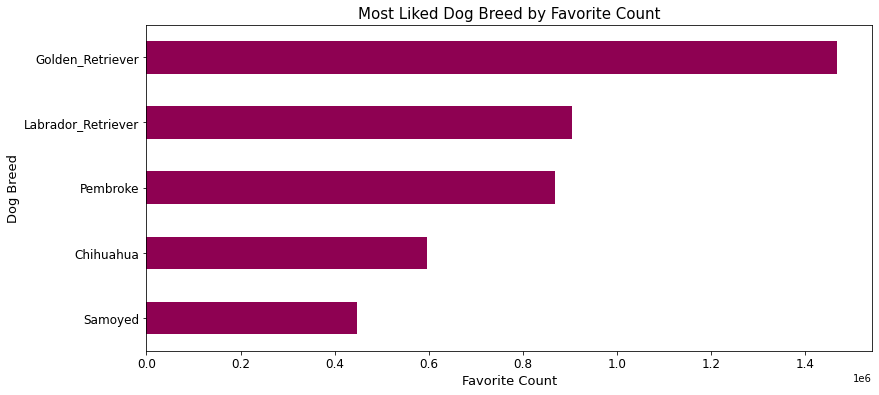

In [68]:
#plot horizontal bar chart
confident_dog_breed.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='PiYG')

#label the plot axes and title
plt.title("Most Liked Dog Breed by Favorite Count",fontsize=15)
plt.xlabel('Favorite Count',fontsize=13)
plt.ylabel("Dog Breed",fontsize= 13);

In [69]:
#extract the month from the timestamp in the dataframe
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month_name().str[:3]

In [72]:
#groupby month
month_tweet= twitter_archive_clean.groupby('month')['retweet_count'].mean()

#order the months chronologically
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
twitter_archive_clean['month'] = pd.Categorical(twitter_archive_clean['month'], categories=months, ordered=True)

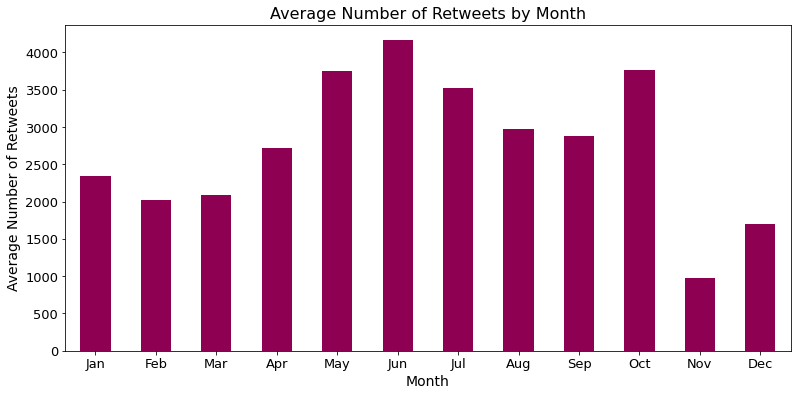

In [73]:
#Plot bar chart and label the plot axes and title
month_tweet.plot(kind= 'bar', rot = 0, figsize = (13,6), fontsize=13,colormap='PiYG')

plt.title("Average Number of Retweets by Month",fontsize=16)
plt.xlabel("Month",fontsize=14)
plt.ylabel("Average Number of Retweets",fontsize=14);

In [74]:
#average retweet count by dog stage
dog_stages = twitter_archive_clean[(twitter_archive_clean['dog_stage'] == "pupper") | (twitter_archive_clean['dog_stage'] == "doggo") | (twitter_archive_clean['dog_stage'] == "puppo") | (twitter_archive_clean['dog_stage'] == "floofer")]
retweeted_dog_stage = dog_stages.groupby('dog_stage')['retweet_count'].mean().sort_values()

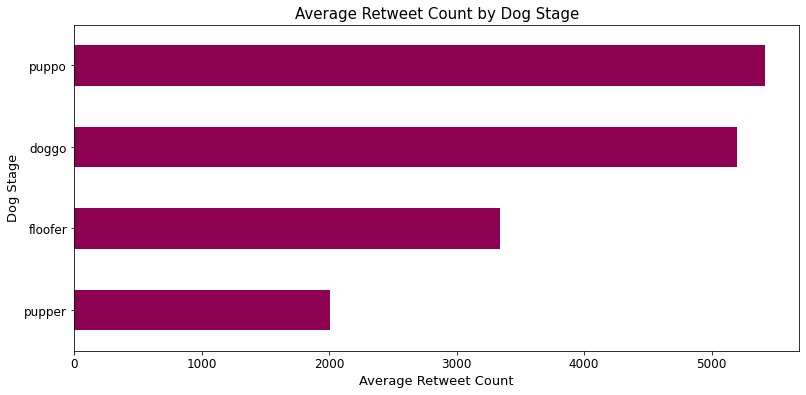

In [75]:
#plot horizontal bar chart
retweeted_dog_stage.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='PiYG')

#label the plot axes and title
plt.title("Average Retweet Count by Dog Stage",fontsize=15)
plt.xlabel('Average Retweet Count',fontsize=13)
plt.ylabel("Dog Stage",fontsize= 13);

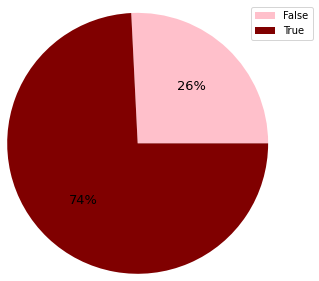

In [88]:
#percentage of image prediction that are dogs
data= twitter_archive_clean.groupby(['dog']).size()
ax= data.plot(kind='pie', ylabel='', autopct='%1.0f%%', radius=1.5, labeldistance=None,
                                            colors = ['pink', 'maroon'], fontsize=13, legend=True)
ax.legend(bbox_to_anchor=(1, 1.15), loc='upper left');

### Insights:
1. The most popular rating given to dogs is 12.0

2. Lucy, Charlie, Oliver and Cooper are the most common names given to dogs

3. The golden retriever is the most liked dog breed by the sum of the favorite count

4. The month of June is the month with the highest average number of retweets

5. Puppo and Doggo stage are the most popular stages of dogs by the average retweet count

6. 74% of the WeRateDogs images predicted are dogs